## HYPOTHESIS
### IDEA
Men are likely to bike in the night time than women 
### Null Hypothesis:
The ratio of man start biking in the night time to man start biking in the day time is the same or lower than the ratio of woman biking in the night time over woman biking in the day time
                
                H0: m_nighttime/m_alltime <= w_nighttime/w_alltime
                Ha: m_nighttime/m_alltime > w_nighttime/w_alltime
                
with:
    - Day time: from 7am - 7pm
    - Night time: from 7pm - 7 am
    - m_nighttime: number of times the biker is male and bike in the night time
    - m_alltime: number of times the biker is male and bike in the whole day
    - w_nighttime: number of times the biker is female and bike in the night time
    - w_alltime: number of times the biker is female and bike in the whole day
    
The signficance level for this test is 0.05 

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline
    
if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

if not os.path.isdir(os.getenv('PUIDATA')):
    os.makedirs(os.getenv('PUIDATA'))

Populating the interactive namespace from numpy and matplotlib


In [2]:
print(os.getenv('PUI2016'))

/home/cusp/ttd255/PUI2016


In [3]:
print(os.getenv('PUIDATA'))

/home/cusp/ttd255/PUIdata


In [4]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [5]:
datestring = '201502'
getCitiBikeCSV(datestring)

file in place, you can continue


In [6]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [7]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [8]:
df.drop(['tripduration', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

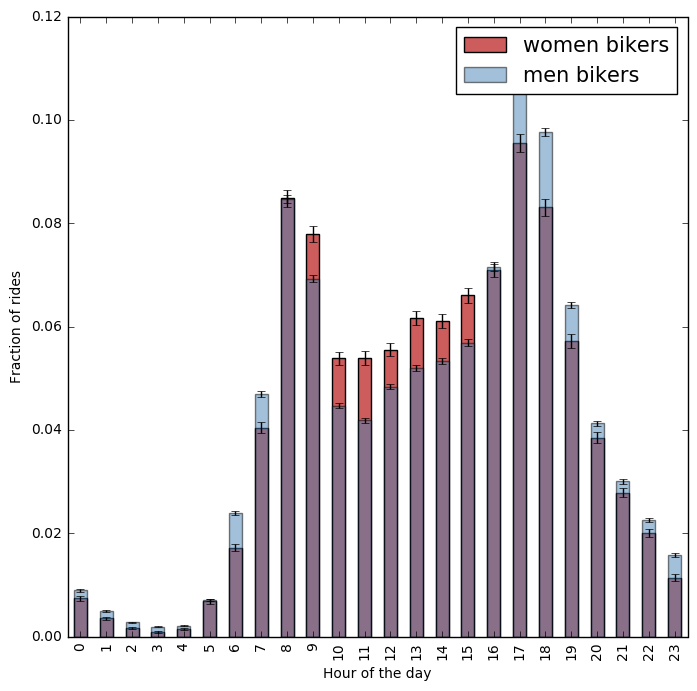

In [14]:
fig1 = pl.figure(figsize(8,8))

counts_w = df['date'][df['gender'] == 2].groupby([df['date'].dt.hour]).count()
counts_m = df['date'][df['gender'] == 1].groupby([df['date'].dt.hour]).count()

norm_w = counts_w.sum()
norm_m = counts_m.sum()

error_w = np.sqrt(counts_w)
error_m = np.sqrt(counts_m)

ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')
ax=((counts_m) / norm_m).plot(kind="bar",color='SteelBlue', alpha = 0.5,  yerr=[
           ((error_m) / norm_m, (error_m) / norm_m)], label='men bikers')

ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Hour of the day")
pl.legend(['women bikers','men bikers'],fontsize=15)

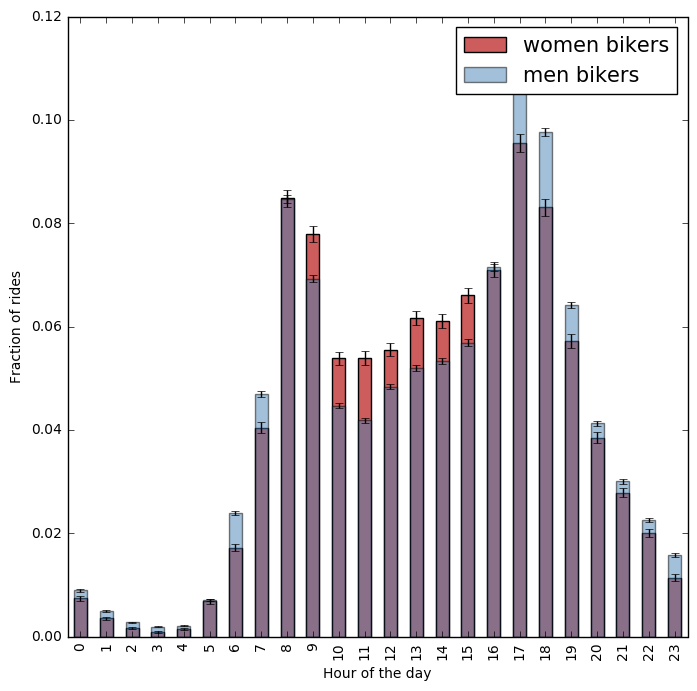

In [16]:
fig1

### Figure 1: Number of Citibike bikers per gender in Februrary 2015 during each hour of the day

From the graph, we can see that during the hours after 5pm and before 8am, the ratios of men bikers is than the ratios of women bikers.

In next step, the ratio of men and women bike at day and night times are caculated.

Men: day:0.774, night:0.226, day error:0.002, night error:0.001
Women: day:0.805, night:0.195, day error:0.005, night error:0.002


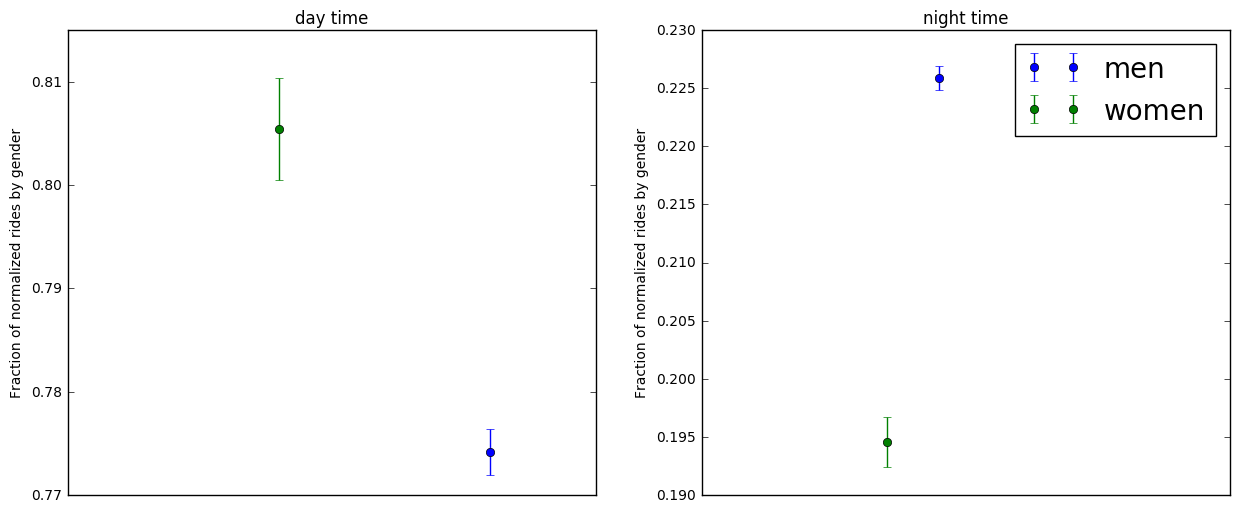

In [10]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

day_w = sum(counts_w[7:19]) * 1.0 / norm_w  #fraction of women riding on week days
night_w = (sum(counts_w[19:]) + sum(counts_w[:7])) * 1.0 / norm_w  #fraction of women riding on weekends
eday_w = np.sqrt(sum(error_w[7:19]**2)) / norm_w  #error on fraction number of women riding on week days
enight_w = np.sqrt(sum(error_w[19:]**2) + sum(error_w[:7])) / norm_w #error on fraction number of women riding on weekends

#same nomenclature as above
day_m = sum(counts_m[7:19]) * 1.0 / norm_m
night_m = (sum(counts_m[19:]) + sum(counts_m[:7])) * 1.0 / norm_m
eday_m = np.sqrt(sum(error_m[7:19]**2)) / norm_m
enight_m = np.sqrt(sum(error_m[19:]**2) + sum(error_m[:7])) / norm_m

print("Men: day:{0:.3f}, night:{1:.3f}, day error:{2:.3f}, night error:{3:.3f}"\
      .format(day_m, night_m, eday_m, enight_m))
print("Women: day:{0:.3f}, night:{1:.3f}, day error:{2:.3f}, night error:{3:.3f}"\
      .format(day_w, night_w, eday_w, enight_w))

ax1.errorbar([0.4], [day_m], yerr=[eday_m], fmt='o', label='men')
ax1.errorbar([0.2], [day_w], yerr=[eday_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [night_m], yerr=[enight_m], fmt='o', label='men')
ax2.errorbar([0.2], [night_w], yerr=[enight_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax1.set_title("day time")
ax2.set_title("night time")
ax2.set_ylabel("Fraction of normalized rides by gender")
ax1.set_ylabel("Fraction of normalized rides by gender")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

### Figure 2: Fraction of Citibike bikers per gender in Februrary 2015 for day time (left) and night time (right)


### The Z-test

### Is the percentage of men that ride in night time lower or equal to that of women?

$z = \frac{(p_0 - p_1)}{SE} $

$p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$

$SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$

$p_0 = \frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}}$

$p_1 = \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}}$

In [11]:
P0mP1 = night_m - night_w
P0mP1

0.031287916570578223

The difference is larger than 0. However, I need to conduct the z-test to examine the significance of this statistics

In [12]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(night_m, night_w, norm_m, norm_w), norm_m, norm_w)
# print (sp_stdev_mw)
z = zscore(night_m, night_w, sp_stdev_mw)
print ("The z statistics is %.2f"%z) 

The z statistics is 12.50


For the p value = 0.0001, the z's threshold value is 3.8, which means that the p value from the test above is smaller than 0.0001. Hence, I can reject the Null hypothesis at the significance level of 5%.